### Using Matplotlib Themes

Matplotlib default style of plots is quite plain. You can easily improve the look of the charts by applying a pre-configured stylesheet. This notebook shows how to apply the [Seaborn theme](https://seaborn.pydata.org/tutorial/aesthetics.html) along with many of the built-in [Matplotlib themes](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) to create aesthetically pleasing charts.

#### Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

We have 12 different CSV files containing crime data for each month of 2020. We download each of them to the data folder.

In [ ]:
files = [
  '2020-01-metropolitan-street.csv',
  '2020-02-metropolitan-street.csv',
  '2020-03-metropolitan-street.csv',
  '2020-04-metropolitan-street.csv',
  '2020-05-metropolitan-street.csv',
  '2020-06-metropolitan-street.csv',
  '2020-07-metropolitan-street.csv',
  '2020-08-metropolitan-street.csv',
  '2020-09-metropolitan-street.csv',
  '2020-10-metropolitan-street.csv',
  '2020-11-metropolitan-street.csv',
  '2020-12-metropolitan-street.csv'
]


data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/police.uk/'

for f in files:
  url = os.path.join(data_url + f)
  download(url)


It will be helpful to merge all 12 CSV files into a single dataframe. We can use `pd.concat()` to merge a list of dataframes.

In [ ]:
dataframe_list = []

for f in files:
    filepath = os.path.join(data_folder, f)
    df = pd.read_csv(filepath)
    dataframe_list.append(df)

merged_df = pd.concat(dataframe_list)

#### Create a Bar Chart

We can also chart the trend of crime over the year. For this, let's group the data by month.

In [ ]:
monthly_counts = merged_df.groupby('Month').size()
monthly_counts

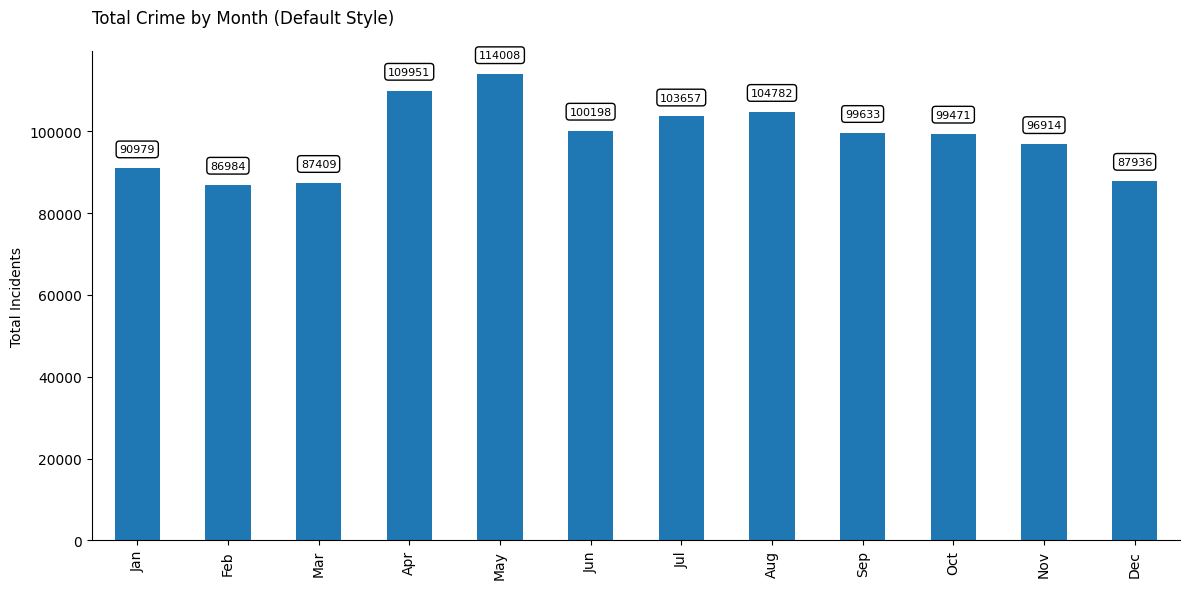

In [15]:
# Use default style
plt.style.use('default')

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,6)
bars = monthly_counts.plot(kind='bar', ax=ax)

ax.set_title('Total Crime by Month (Default Style)', loc='left', pad=20)
ax.set_xlabel('')
ax.set_ylabel('Total Incidents')
ax.set_xticks(np.arange(len(monthly_counts)))

# Extra: Add labels on bars
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(
        height,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 10),
        fontsize=8,
        textcoords="offset points", ha='center', va='bottom',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Extra: Custmize X-Axis labels

labels = []
for date in pd.to_datetime(monthly_counts.index):
  labels.append(date.strftime('%b'))
ax.set_xticklabels(labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

output_path = os.path.join(output_folder, 'default.png')
plt.savefig(output_path, dpi=300)

plt.show()


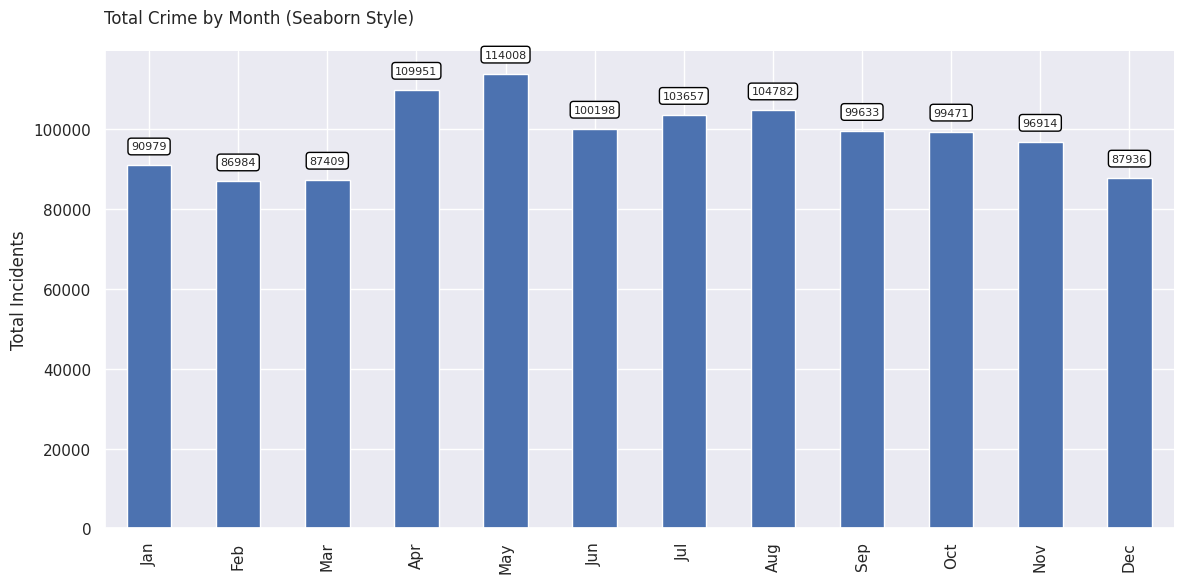

In [16]:
# Use seaborn style
import seaborn as sns
sns.set_theme()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,6)
bars = monthly_counts.plot(kind='bar', ax=ax)

ax.set_title('Total Crime by Month (Seaborn Style)', loc='left', pad=20)
ax.set_xlabel('')
ax.set_ylabel('Total Incidents')
ax.set_xticks(np.arange(len(monthly_counts)))

# Extra: Add labels on bars
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(
        height,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 10),
        fontsize=8,
        textcoords="offset points", ha='center', va='bottom',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Extra: Custmize X-Axis labels

labels = []
for date in pd.to_datetime(monthly_counts.index):
  labels.append(date.strftime('%b'))
ax.set_xticklabels(labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

output_path = os.path.join(output_folder, 'seaborn.png')
plt.savefig(output_path, dpi=300)

plt.show()

Matplotlib comes with many built-in themes. Let's see what styles are available.

In [ ]:
plt.style.available

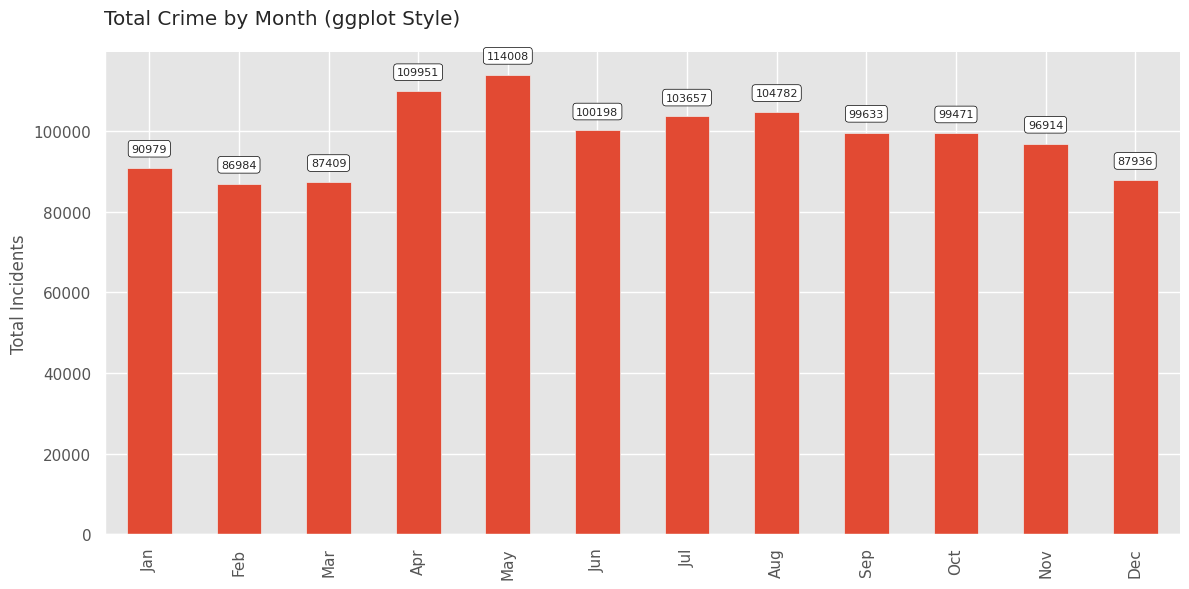

In [17]:
# Use ggplot style
plt.style.use('ggplot')

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,6)
bars = monthly_counts.plot(kind='bar', ax=ax)

ax.set_title('Total Crime by Month (ggplot Style)', loc='left', pad=20)
ax.set_xlabel('')
ax.set_ylabel('Total Incidents')
ax.set_xticks(np.arange(len(monthly_counts)))

# Extra: Add labels on bars
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(
        height,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 10),
        fontsize=8,
        textcoords="offset points", ha='center', va='bottom',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Extra: Custmize X-Axis labels

labels = []
for date in pd.to_datetime(monthly_counts.index):
  labels.append(date.strftime('%b'))
ax.set_xticklabels(labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

output_path = os.path.join(output_folder, 'ggplot.png')
plt.savefig(output_path, dpi=300)

plt.show()